# Image Compression

K-means clustering is one of the most popular unsupervised clustering algorithms. A cluster implies a collection of data points grouped together because of some similarities. There are a large number of applications of clustering such as segmentation, sorting, marketing and sales, and etc.

![image.png](attachment:29e465cf-c963-4b9a-ac1d-fbc14480d007.png)

We use image comprossion techniques because there might be a variety of needs for image compression such as :
* Data needs lesser space when compressed allowing much more data to be stored with less disk space. This is crucial in many things that images need to be archived and dataset volume is massive.
* We also might need to extract and store the most useful components of an image, which is represented as embedding, so an image compression might be a very beneficial approach to store more data.

# Importing Libraries

In [ ]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

     |████████████████████████████████| 11.1 MB 919 kB/s 
  Created wheel for Pillow: filename=Pillow-4.0.0-cp37-cp37m-linux_x86_64.whl size=1252086 sha256=7b605b75d4bd11a7658f709b0853e14a384dceccdae7d3d5d1516067dad7a6f6
  Stored in directory: /root/.cache/pip/wheels/ec/1e/24/dbc5e4964ea99cad93230a9013d934fb5adc322c3102f69e45
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.2.0
    Uninstalling Pillow-7.2.0:
      Successfully uninstalled Pillow-7.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.8.1 requires pillow>=4.1.1, but you have pillow 4.0.0 which is incompatible.
scikit-image 0.18.1 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 4.0.0 which is incompatible.
matplotlib 3.4.1 requires pillow>=6.2.0, but you have pillow 4.0.0 which is incompatible.
fury 0.7.0 requires pillow>=5

In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")

from skimage import io
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_sample_image
import seaborn as sns; sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/film-image/lion.jpg
/kaggle/input/film-image/meerkat.jpg
/kaggle/input/film-image/wolf2.jpg
/kaggle/input/film-image/tiger2.jpg
/kaggle/input/film-image/panda3.jpg
/kaggle/input/film-image/panda2.jpg
/kaggle/input/film-image/zebra.jpg
/kaggle/input/film-image/dog.jpg
/kaggle/input/film-image/elephant.jpg
/kaggle/input/film-image/tiger.jpg
/kaggle/input/film-image/orangutan.jpeg
/kaggle/input/film-image/quokka.jpg
/kaggle/input/film-image/fox.jpg
/kaggle/input/film-image/panda.jpg
/kaggle/input/film-image/bunny.jpg
/kaggle/input/film-image/wolf.jpg
/kaggle/input/film-image/film.png


# Loading Images Dataset and Analyzing the Properties of Images

The image shape contains the rows, columns and channels in the image.

(381, 271, 3)
309753


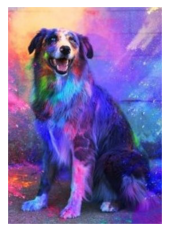

In [ ]:
# Note: this requires the ``pillow`` package to be installed
dog = imread('../input/film-image/dog.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(dog);
print(dog.shape)
print(dog.size)

(298, 203, 3)
181482


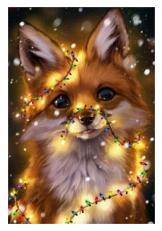

In [ ]:
fox = imread('../input/film-image/fox.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(fox);
print(fox.shape)
print(fox.size)

(275, 220, 3)
181500


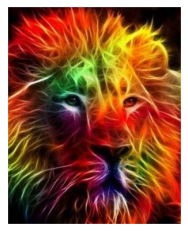

In [ ]:
lion = imread('../input/film-image/lion.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(lion);
print(lion.shape)
print(lion.size)

(286, 304, 3)
260832


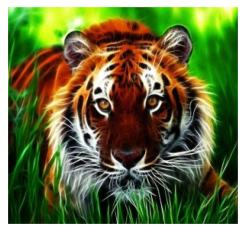

In [ ]:
tiger = imread('../input/film-image/tiger2.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(tiger);
print(tiger.shape)
print(tiger.size)

(328, 302, 3)
297168


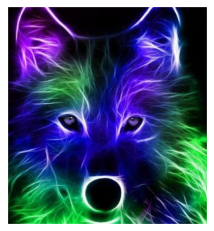

In [ ]:
wolf = imread('../input/film-image/wolf.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(wolf);
print(wolf.shape)
print(wolf.size)

(148, 201, 3)
89244


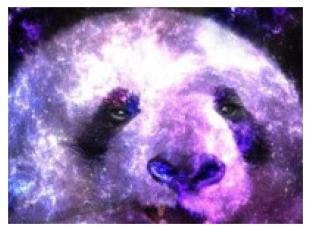

In [ ]:
panda = imread('../input/film-image/panda3.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(panda);
print(panda.shape)
print(panda.size)

 We divide the image by 255 because that is the maximum intensity value for RGB individually.
For the line img_dog = img_dog.reshape(number * number, 3) take the number from your image size for it to work

In [ ]:
doggy = dog / 255.0 # use 0...1 scale
doggy = doggy.reshape(381 * 271, 3)
doggy.shape

(103251, 3)

In [ ]:
foxy = fox / 255.0 # use 0...1 scale
foxy = foxy.reshape(298 * 203, 3)
foxy.shape

(60494, 3)

In [ ]:
liony = lion / 255.0 # use 0...1 scale
liony = liony.reshape(275 * 220, 3)
liony.shape

(60500, 3)

In [ ]:
tigery = tiger / 255.0 # use 0...1 scale
tigery = tigery.reshape(286 * 304, 3)
tigery.shape

(86944, 3)

In [ ]:
wolfy = wolf / 255.0 # use 0...1 scale
wolfy = wolfy.reshape(328 * 302, 3)
wolfy.shape

(99056, 3)

In [ ]:
panday = panda / 255.0 # use 0...1 scale
panday = panday.reshape(148 * 201, 3)
panday.shape

(29748, 3)

# Visualize pixels in Color Space (Dog)

In [ ]:
def plot_pixels(doggy, title, colors=None, N=10000):
    if colors is None:
        colors = doggy
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(doggy.shape[0])[:N]
    colors = colors[i]
    R, G, B = doggy[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

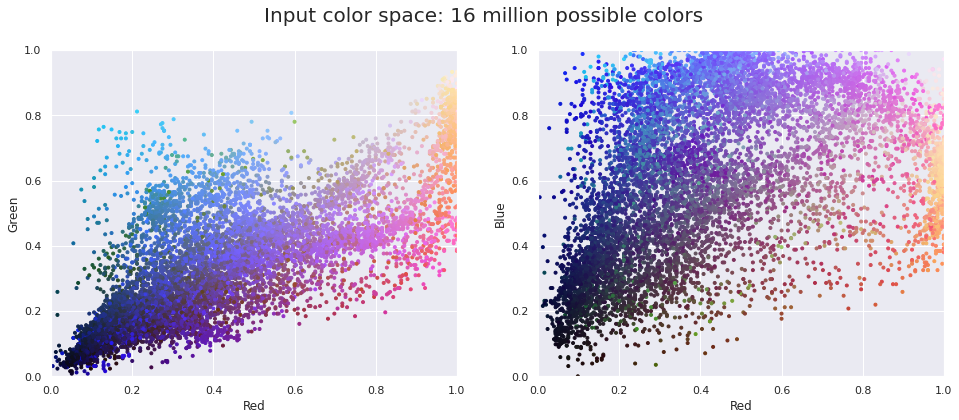

In [ ]:
plot_pixels(doggy, title='Input color space: 16 million possible colors')

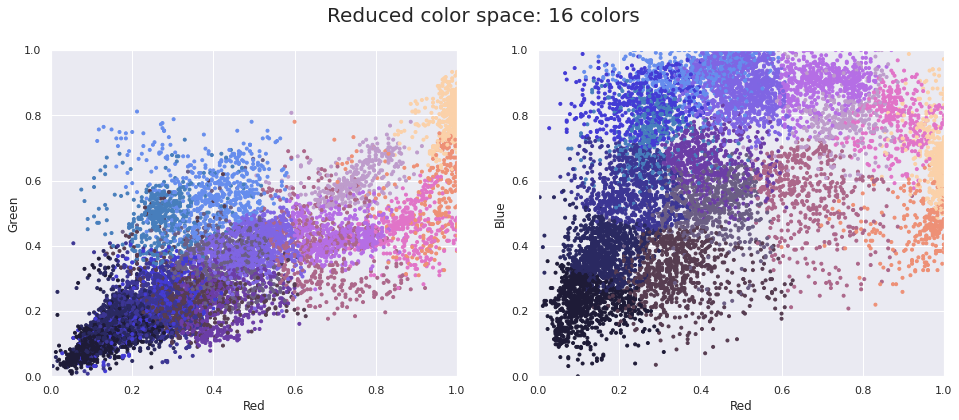

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(doggy)
new_colors = kmeans.cluster_centers_[kmeans.predict(doggy)]

plot_pixels(doggy, colors=new_colors,
            title="Reduced color space: 16 colors")

# Plotting New Colors in Image Space

Below are different animals that we extract the color to make the chart and to give it different colors! We take the extraction from the charts above and recolor the animals to 16 colors.

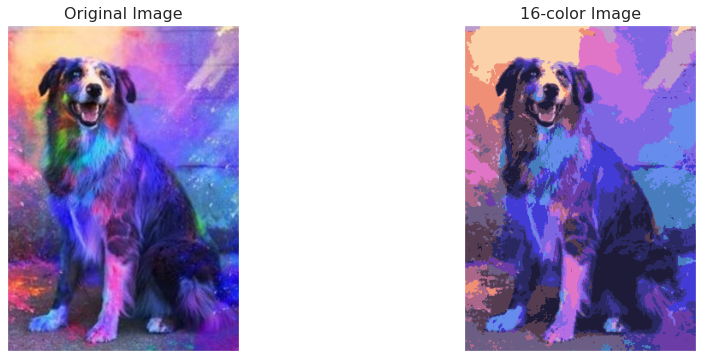

In [ ]:
dog_recolored = new_colors.reshape(dog.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(dog)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(dog_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("dog_kmean.png", dpi=125)

# Fox

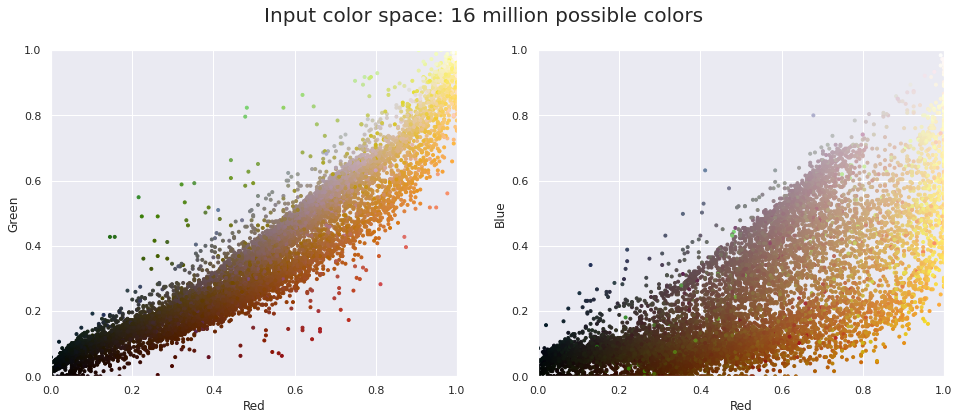

In [ ]:
plot_pixels(foxy, title='Input color space: 16 million possible colors')

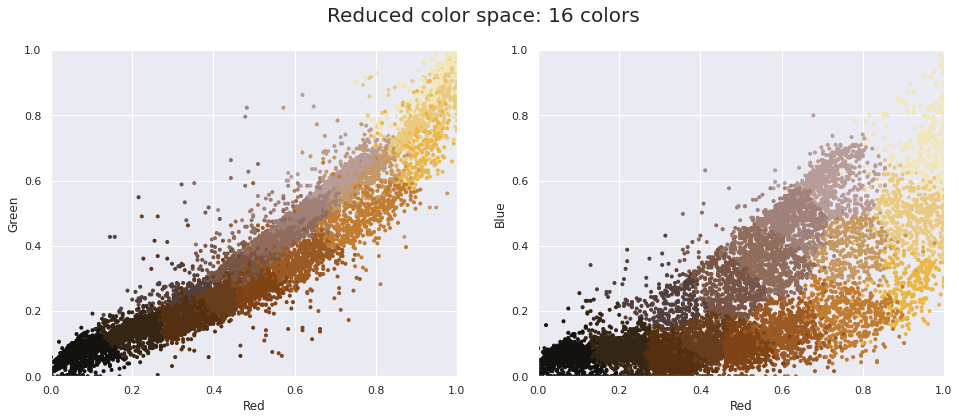

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(foxy)
new_colors = kmeans.cluster_centers_[kmeans.predict(foxy)]

plot_pixels(foxy, colors=new_colors,
            title="Reduced color space: 16 colors")

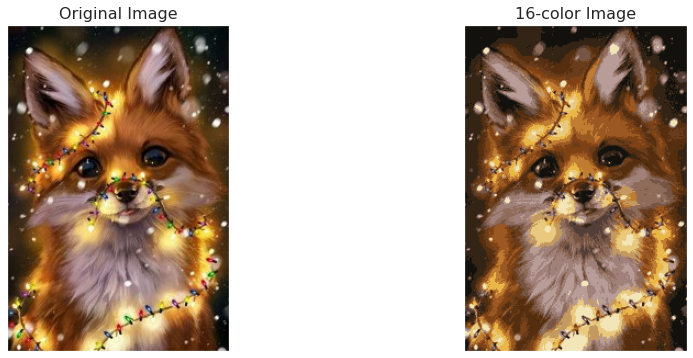

In [ ]:
fox_recolored = new_colors.reshape(fox.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(fox)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(fox_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("fox_kmean.png", dpi=125)

# Lion

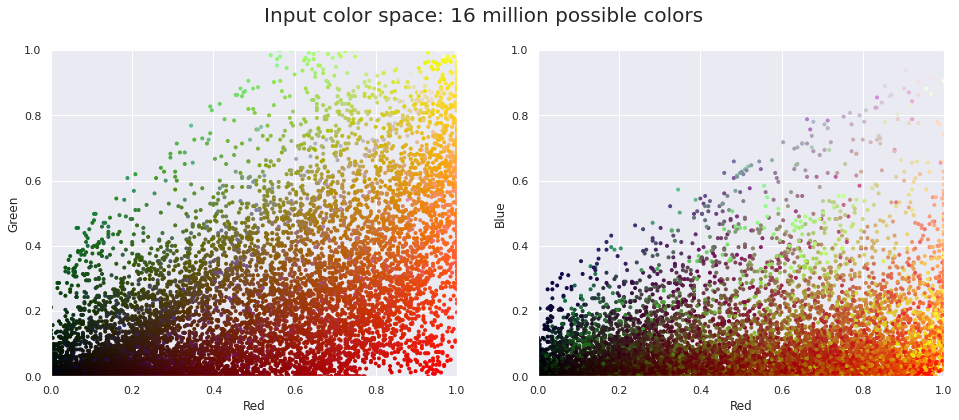

In [ ]:
plot_pixels(liony, title='Input color space: 16 million possible colors')

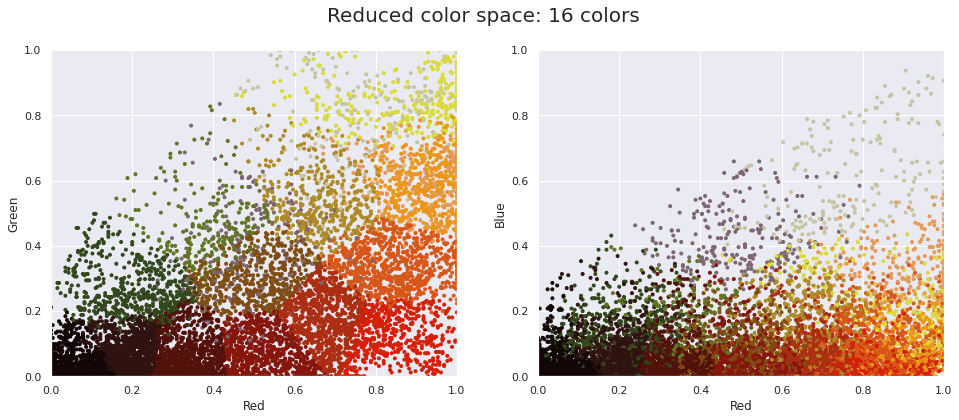

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(liony)
new_colors = kmeans.cluster_centers_[kmeans.predict(liony)]

plot_pixels(liony, colors=new_colors,
            title="Reduced color space: 16 colors")

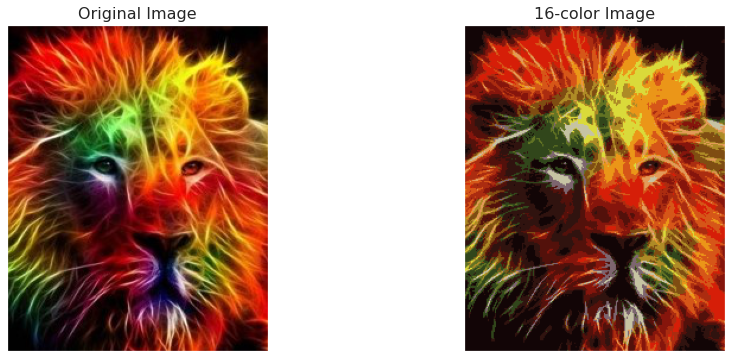

In [ ]:
lion_recolored = new_colors.reshape(lion.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(lion)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(lion_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("lion_kmean.png", dpi=125)

# Tiger

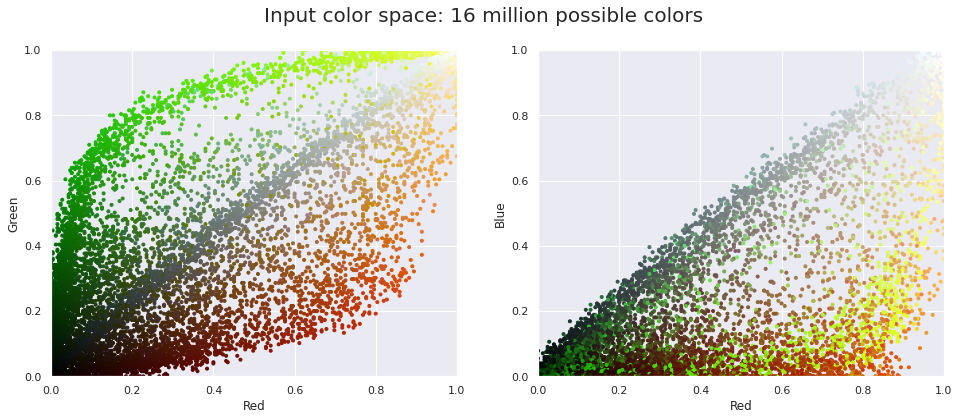

In [ ]:
plot_pixels(tigery, title='Input color space: 16 million possible colors')

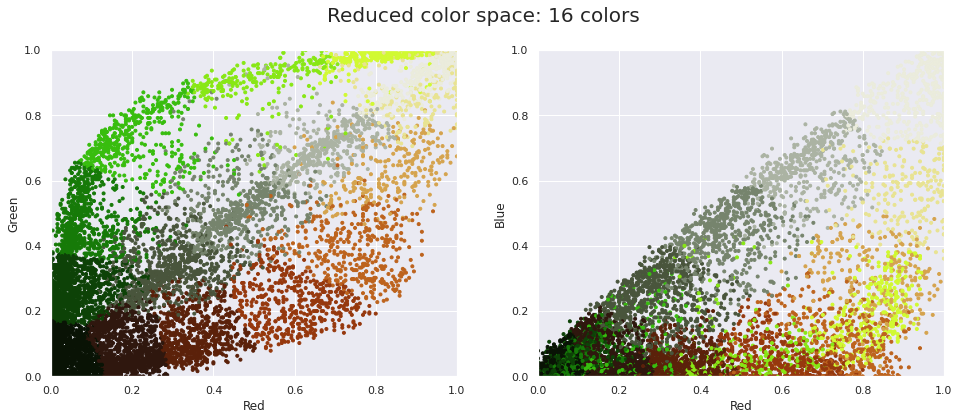

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(tigery)
new_colors = kmeans.cluster_centers_[kmeans.predict(tigery)]

plot_pixels(tigery, colors=new_colors,
            title="Reduced color space: 16 colors")

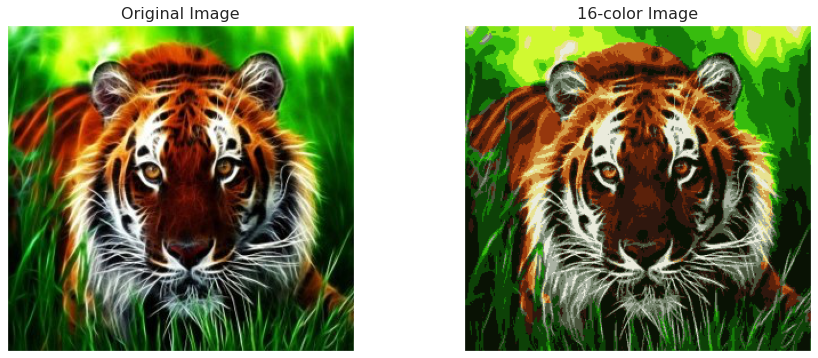

In [ ]:
tiger_recolored = new_colors.reshape(tiger.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(tiger)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(tiger_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("tiger_kmean.png", dpi=125)

# Wolf

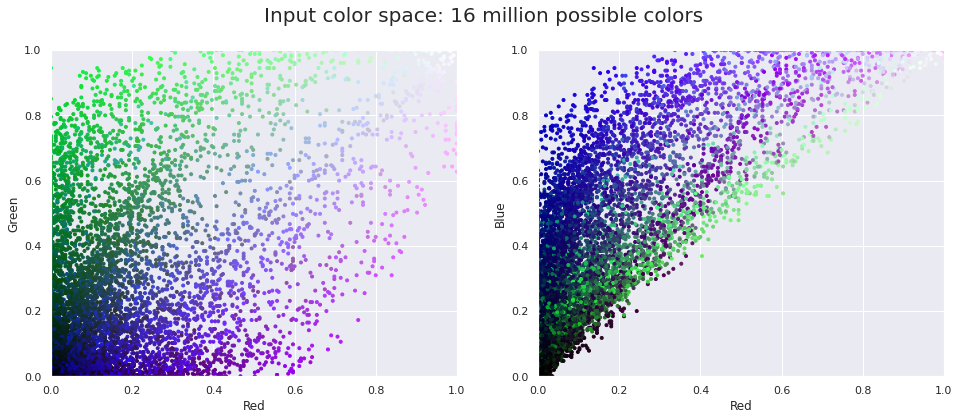

In [ ]:
plot_pixels(wolfy, title='Input color space: 16 million possible colors')

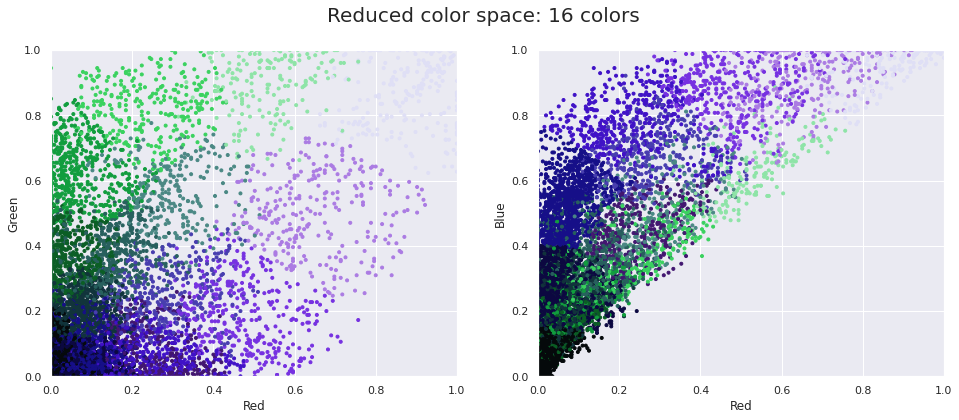

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(wolfy)
new_colors = kmeans.cluster_centers_[kmeans.predict(wolfy)]

plot_pixels(wolfy, colors=new_colors,
            title="Reduced color space: 16 colors")

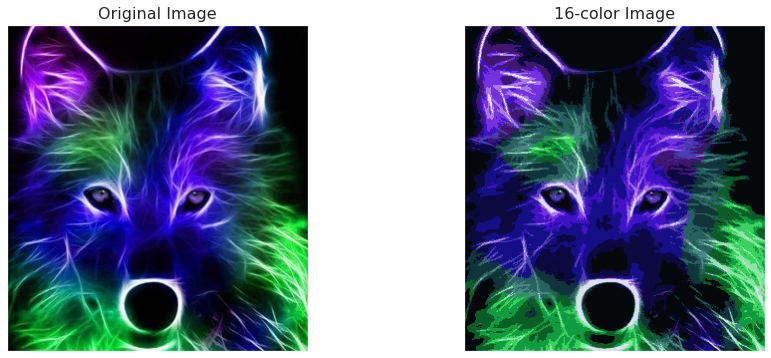

In [ ]:
wolf_recolored = new_colors.reshape(wolf.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(wolf)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(wolf_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("wolf_kmean.png", dpi=125)

# Panda

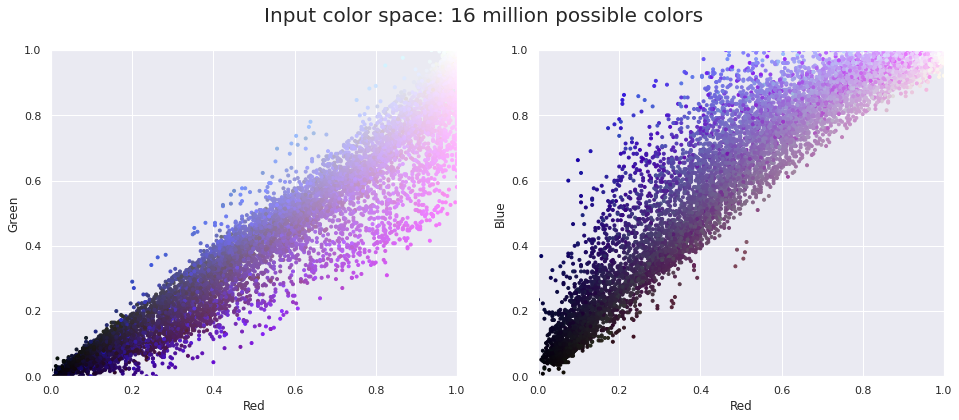

In [ ]:
plot_pixels(panday, title='Input color space: 16 million possible colors')

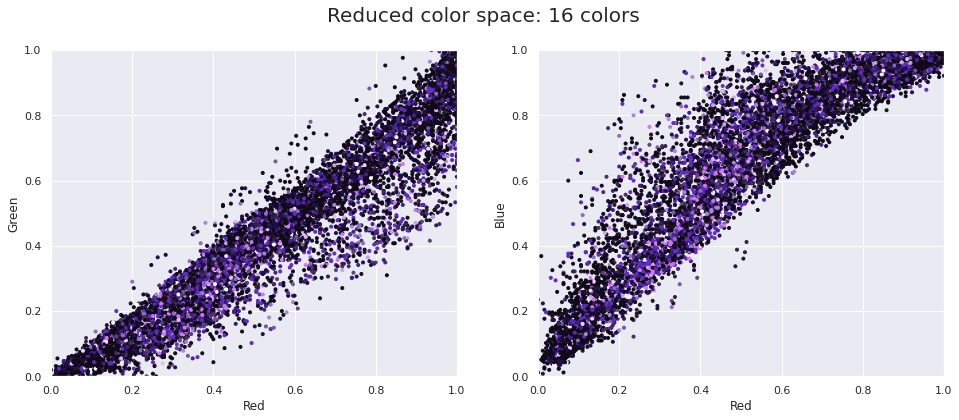

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(panday)
new_colors = kmeans.cluster_centers_[kmeans.predict(wolfy)]

plot_pixels(panday, colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
'''panda_recolored = new_colors.reshape(panda.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(panda)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(panda_recolored)
ax[1].set_title('16-color Image', size=16);

# store to file
plt.savefig("panda_kmean.png", dpi=125)'''

'panda_recolored = new_colors.reshape(panda.shape)\n\nfig, ax = plt.subplots(1, 2, figsize=(16, 6),\n                       subplot_kw=dict(xticks=[], yticks=[]))\nfig.subplots_adjust(wspace=0.05)\nax[0].imshow(panda)\nax[0].set_title(\'Original Image\', size=16)\nax[1].imshow(panda_recolored)\nax[1].set_title(\'16-color Image\', size=16);\n\n# store to file\nplt.savefig("panda_kmean.png", dpi=125)'